In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing required Libraries

In [ ]:
#importing pandas and numpy libraries
import pandas as pd
import numpy as np

#importing utility libraries
import math
import warnings
import string

# Matplotlib libraries
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D


# sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


#importing classifier
from sklearn.ensemble import RandomForestClassifier

#importing Seaborn
import seaborn as sns

#ignoring all warinings
warnings.filterwarnings("ignore")

# Loading Dataset



In [ ]:
#using pandas dataframes to load contents
df = pd.read_csv("/content/cardio_train.csv",delimiter=";",skiprows= [49961])
df.head()

,id,age,gender,height,weight,sys_bp,dia_bp,cholesterol,glucose,smoke,alco,active,target
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
#displaying the data in the dataframe
df.head(10)

,id,age,gender,height,weight,sys_bp,dia_bp,cholesterol,glucose,smoke,alco,active,target
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


# Data Cleaning

In [ ]:
# printing the length of the dataframe
length = df.shape[0]*df.shape[1]
print('Length of the data frame : ', length)

# printing missing values
missing_vals = df.isna().sum().sum()
print('Missing values: ', missing_vals, '\n')

# checking for duplicates
df_dup = df.duplicated().sum()
if df_dup:
    print('Duplicates Rows : {}'.format(df_dup))
else:
    print('No duplicates')

Length of the data frame :  909974
Missing values:  0 

No duplicates


In [ ]:
# dropping duplicates if any
df=df.drop_duplicates()

In [ ]:
# dropping the ID row as we do not need it for prediction
df.drop(['id'], axis=1,inplace=True)

In [ ]:
#describing the data
df.describe()

,age,gender,height,weight,sys_bp,dia_bp,cholesterol,glucose,smoke,alco,active,target
count,69998.000000,69998.000000,69998.000000,69998.000000,69998.000000,69998.000000,69998.000000,69998.000000,69998.000000,69998.000000,69998.000000,69998.000000
mean,19468.892454,1.349567,164.359296,74.205639,128.817109,96.630747,1.366839,1.226464,0.088131,0.053773,0.803737,0.499700
std,2467.272520,0.476837,8.210060,14.395955,154.013595,188.475211,0.680228,0.572277,0.283487,0.225571,0.397172,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Converting the age from days to years as we will be taking years as input from the user
df['age'] = df['age'].apply(lambda x: x/365)  

### Outlier Detection in systolic blood pressure and diastolic blood pressure columns

In [ ]:
# Determining the outliers
outliers = len(df[(df["sys_bp"]>=280) | (df["dia_bp"]>=220) | (df["dia_bp"] < 0) | (df["sys_bp"] < 0) | (df["sys_bp"]<df["dia_bp"])])

print(f'total {outliers} outliers')
print(f'percent missing: {round(outliers/len(df)*100,1)}%')

total 1275 outliers
percent missing: 1.8%


In [ ]:
# Checking for misleading BP measure that might not be correct
df = df[ (df['dia_bp'] >= 0) & (df['sys_bp'] >= 0) ]  
df = df[ (df['dia_bp'] <= 220) & (df['sys_bp'] <= 280) ]
df = df[ (df['dia_bp'] < df['sys_bp']) ]  

In [ ]:
#getting the first 5th percentile of the data
Quartile1_hi = df['sys_bp'].quantile(0.05) 
#getting the 95th percentile of the data
Quartile3_hi = df['sys_bp'].quantile(0.95)
InterQuartileRange_hi = Quartile3_hi - Quartile1_hi
lower, upper = Quartile1_hi - 1.5 * InterQuartileRange_hi, Quartile3_hi + 1.5 * InterQuartileRange_hi
df = df[(df['sys_bp'] >= lower) & (df['sys_bp'] <= upper)]  
#getting the first 5th percentile of the data
Quartile1_lo = df['dia_bp'].quantile(0.05) 
#getting the 95th percentile of the data
Quartile3_lo = df['dia_bp'].quantile(0.95)  # 95th percentile of the data of the given feature
InterQuartileRange_lo = Quartile3_lo - Quartile1_lo
lower, upper = Quartile1_lo - 1.5 * InterQuartileRange_lo, Quartile3_lo + 1.5 * InterQuartileRange_lo
df = df[(df['dia_bp'] >= lower) & (df['dia_bp'] <= upper)]  

### Visualizing systoli blood pressure and diastolic blood pressure data


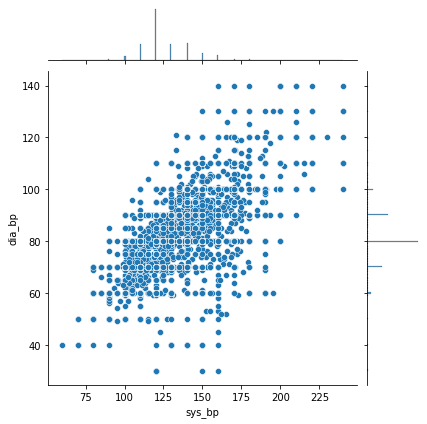

In [ ]:
#visually representing systoli blood pressure and diastolic blood pressure
sns.jointplot(x='sys_bp', y='dia_bp', data=df);

### Outlier Detection in height and weight columns

In [ ]:
def detect_outliers(df,q1,q3):
  for col in df.columns:
    df_feature = df[col]
    Quartile1 = df_feature.quantile(q1) # 5th percentile of the data of the given feature
    Quartile3 = df_feature.quantile(q3)  # 95th percentile of the data of the given feature
    IQR = Quartile3 - Quartile1    #IQR is interquartile range. 
    print(f'Feature: {col}')
    print(f'Percentiles: {int(q1*100)}th={Quartile1}, {int(q3*100)}th={Quartile3}, IQR={IQR}')
    # calculate the outlier lower and upper bound
    lower, upper = Quartile1 - 1.5 * IQR, Quartile3 + 1.5 * IQR
    # identify outliers
    outliers = [x for x in df_feature if x < lower or x > upper]
    print('Identified outliers: %d \n' % len(outliers))
  
detect_outliers(df[['height', 'weight']],0.05,0.95)

Feature: height
Percentiles: 5th=152.0, 95th=178.0, IQR=26.0
Identified outliers: 46 

Feature: weight
Percentiles: 5th=55.0, 95th=100.0, IQR=45.0
Identified outliers: 20 



### Visualizing height and weight data

<Figure size 1080x360 with 0 Axes>

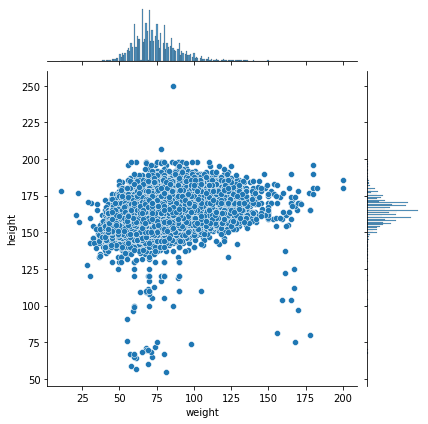

In [ ]:
#Visualizing height and weight data
plt.figure(figsize=(15,5))
sns.jointplot(x='weight',y='height',data=df)

In [ ]:
#Removing the outliers in weight and height
df_cleaned = df 
for col in ['height','weight']:
  Quartile1 = df[col].quantile(0.05) # 5th percentile of the data of the given feature
  Quartile3 = df[col].quantile(0.95)  # 95th percentile of the data of the given feature
  InterQuartileRange = Quartile3 - Quartile1
  lower, upper = Quartile1 - 1.5 * InterQuartileRange, Quartile3 + 1.5 * InterQuartileRange
  df_cleaned = df_cleaned[(df_cleaned[col] >= lower) & (df_cleaned[col] <= upper)]  

### Calculating the BMI

In [ ]:
# calculating the patient BMI (Body Mass Index) from the weight and height
df_cleaned['BMI'] = round(df_cleaned['weight']/((df_cleaned['height']/100)**2),1)
df_cleaned.head()

,age,gender,height,weight,sys_bp,dia_bp,cholesterol,glucose,smoke,alco,active,target,BMI
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.9
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.5
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.7
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.0


In [ ]:
#cleaning BMI data
df_cleaned = df_cleaned[ (df_cleaned['BMI'] < 60) & (df_cleaned['BMI'] > 10)]

# Final Dataset for Training

In [ ]:
#Dataset after cleaning
print(f'Number of rows of df dataset after data preprocessing: {len(df_cleaned)}')
print(f'How much percent missing: {round((70000-len(df_cleaned))/70000*100,2)}%')

Number of rows of df dataset after data preprocessing: 68582
How much percent missing: 2.03%


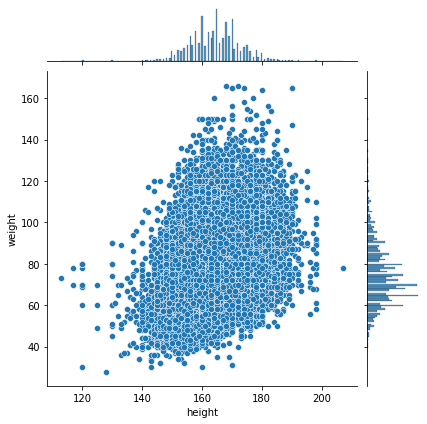

In [ ]:
sns.jointplot(x='height', y='weight', data=df_cleaned);

# Distribution of coronary vascular disease by gender

[Text(0, 0, 'Male'), Text(0, 0, 'Female')]

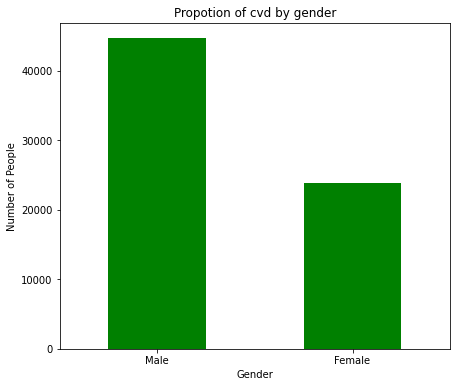

In [ ]:
#Distribution of coronary vascular disease by gender
gender = df_cleaned['gender'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender.plot(kind='bar', rot=0, color="g")
ax.set_title("Propotion of cvd by gender", y = 1)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of People')
ax.set_xticklabels(('Male', 'Female'))

# Correlation Map Between Features

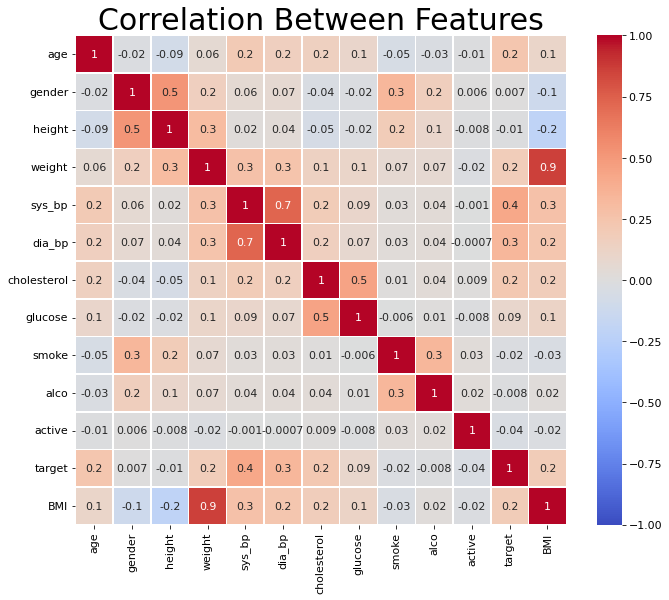

In [ ]:
#plotting correlation map
plt.rcParams.update({'font.size': 11})
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_cleaned.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax, fmt='.1g', linewidths=.5);
plt.title('Correlation Between Features', fontsize = 30)
plt.show()

# Standardizing the Data

In [ ]:
#we perform some Standardization
df_scaled=df_cleaned.copy()

columns_to_scale = ['age', 'weight', 'sys_bp', 'dia_bp','cholesterol','gender','BMI','height']

scaler = StandardScaler()
df_scaled[columns_to_scale] = scaler.fit_transform(df_cleaned[columns_to_scale])

df_scaled.head()

,age,gender,height,weight,sys_bp,dia_bp,cholesterol,glucose,smoke,alco,active,target,BMI
0,-0.434234,1.36696,0.453577,-0.853013,-0.999463,-0.137129,-0.537112,1,0,0,1,0,-1.047946
1,0.309309,-0.73155,-1.063547,0.772519,0.799812,0.923668,2.409079,1,0,0,1,1,1.437583
2,-0.246221,-0.73155,0.074296,-0.711663,0.200053,-1.197926,2.409079,1,0,0,0,1,-0.758931
3,-0.746238,1.36696,0.580004,0.560493,1.399570,1.984465,-0.537112,1,0,0,1,1,0.242988
4,-0.806613,-0.73155,-1.063547,-1.277065,-1.599221,-2.258723,-0.537112,1,0,0,0,0,-0.855269


In [ ]:
#we perform some Standardization using minmaxscaler
df_scaled_mm=df_cleaned.copy()

columns_to_scale_mm = ['age', 'weight', 'sys_bp', 'dia_bp','cholesterol','gender','BMI','height']

mmscaler = MinMaxScaler()
df_scaled_mm[columns_to_scale_mm] = mmscaler.fit_transform(df_cleaned[columns_to_scale_mm])

df_scaled_mm.head()

,age,gender,height,weight,sys_bp,dia_bp,cholesterol,glucose,smoke,alco,active,target,BMI
0,0.588076,1.0,0.585106,0.246377,0.277778,0.454545,0.0,1,0,0,1,0,0.231557
1,0.730159,0.0,0.457447,0.413043,0.444444,0.545455,1.0,1,0,0,1,1,0.495902
2,0.624003,0.0,0.553191,0.260870,0.388889,0.363636,1.0,1,0,0,0,1,0.262295
3,0.528455,1.0,0.595745,0.391304,0.500000,0.636364,0.0,1,0,0,1,1,0.368852
4,0.516918,0.0,0.457447,0.202899,0.222222,0.272727,0.0,1,0,0,0,0,0.252049


# Generating training and testing sets

In [ ]:
#Train-test-split for non-scaled data
X = df_cleaned.drop(['target'], axis=1) #features 
y = df_cleaned['target']  #target feature

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)


#Train-test-split for scaled data
X_scaled = df_scaled.drop(['target'], axis=1) #features 
y_scaled = df_scaled['target']  #target feature

X_scaled_mm = df_scaled_mm.drop(['target'], axis=1) #features 
y_scaled_mm = df_scaled_mm['target']  #target feature

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42, shuffle = True)
X_train_scaled_mm, X_test_scaled_mm, y_train_scaled_mm, y_test_scaled_mm = train_test_split(X_scaled_mm, y_scaled_mm, test_size=0.2, random_state=42, shuffle = True)


#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (54865, 12)
X_test shape is  (13717, 12)
y_train shape is  (54865,)
y_test shape is  (13717,)


# Creating Model 

In [ ]:
rndForestClassifier = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [500], 'max_features':['sqrt'], 'max_depth':[20], 'max_leaf_nodes':[2,5,10,50,100,200,300,400,500,750,1000]}, cv=5, scoring=['accuracy','recall'], refit='accuracy').fit(X_train, y_train)
print(rndForestClassifier.best_estimator_)

RandomForestClassifier(max_depth=20, max_features='sqrt', max_leaf_nodes=750,
                       n_estimators=500)


# Model 

In [27]:
rf = RandomForestClassifier(n_estimators=500, max_depth=20, max_features='sqrt', max_leaf_nodes=750)
rf.fit(X_train,y_train)

y_predict = rf.predict(X_test)
y_predicted = np.array(y_predict > 0.5, dtype=float)

rndForest_acc = accuracy_score(y_test, y_predicted)
cm = confusion_matrix(y_test, y_predicted)
rndForest_tpr = cm[1][1] /(cm[1][0] + cm[1][1])
rndForest_report = classification_report(y_test, y_predicted)


print("Accuacy: ",rndForest_acc)
print("True Positive Rate: ", rndForest_tpr)
print("Report: ",rndForest_report)
print("True Positive : ",cm[1][1])
print("True Negative: ",cm[0][0])

Accuacy:  0.7343442443683021
True Positive Rate:  0.6981300089047195
Report:                precision    recall  f1-score   support

           0       0.73      0.77      0.75      6979
           1       0.75      0.70      0.72      6738

    accuracy                           0.73     13717
   macro avg       0.74      0.73      0.73     13717
weighted avg       0.73      0.73      0.73     13717

True Positive :  4704
True Negative:  5369
